# Cancer Data

In [99]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score
import itertools
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sam1o1/cell-samplescsv")

print("Path to dataset files:", path)

100%|██████████| 5.80k/5.80k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\Behbab\.cache\kagglehub\datasets\sam1o1\cell-samplescsv\versions\1


In [21]:
df = pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [23]:
df.shape

(699, 11)

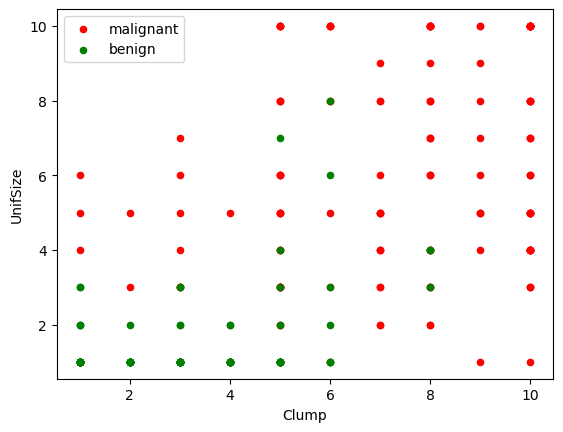

In [29]:
ax = df[df['Class'] == 4][0:150].plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignant');
df[df['Class'] == 2][0:150].plot(kind='scatter', x='Clump', y='UnifSize', color='green', label='benign', ax=ax);
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [53]:
df = df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
df.shape

(683, 11)

In [61]:
df.loc[:, 'BareNuc'] = df.loc[:, 'BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [65]:
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [87]:
c = SVC(kernel='rbf')
c.fit(X_train, y_train)

yhat = c.predict(X_test)

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

[[85  5]
 [ 0 47]]


Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


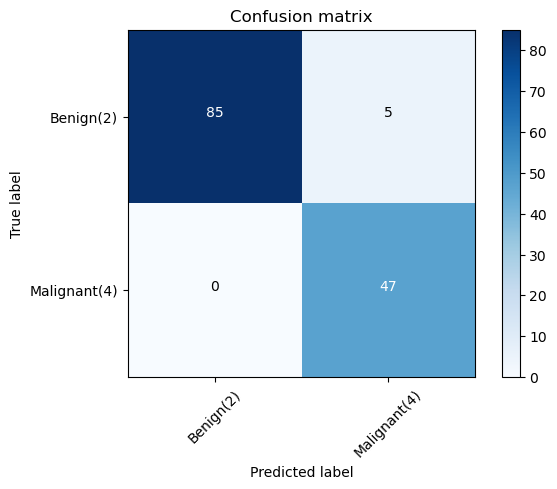

In [96]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
matrix = confusion_matrix(y_test, yhat, labels=[2,4])
plot_confusion_matrix(matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [103]:
print(f1_score(y_test, yhat, average='weighted'))
print(jaccard_score(y_test, yhat,pos_label=2))

0.9639038982104676
0.9444444444444444


In [107]:
c1 = SVC(kernel='sigmoid')
c1.fit(X_train, y_train)

yhat1 = c1.predict(X_test)

print(classification_report(y_test, yhat1))
print(f1_score(y_test, yhat1, average='weighted'))
print(jaccard_score(y_test, yhat1,pos_label=2))
1.797- exam- 

              precision    recall  f1-score   support

           2       0.53      0.60      0.57        90
           4       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

0.37146023617533536
0.39416058394160586


In [111]:
c2 = SVC(kernel='poly')
c2.fit(X_train, y_train)

yhat2 = c2.predict(X_test)

print(classification_report(y_test, yhat2))
print(f1_score(y_test, yhat2, average='weighted'))
print(jaccard_score(y_test, yhat2, pos_label=2))

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

0.9710669934861801
0.9555555555555556


In [115]:
c1 = SVC(kernel='linear')
c1.fit(X_train, y_train)

yhat1 = c1.predict(X_test)

print(classification_report(y_test, yhat1))
print(f1_score(y_test, yhat1, average='weighted'))
print(jaccard_score(y_test, yhat1,pos_label=2))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

0.9639038982104676
0.9444444444444444
